## 利用不同因素去預測nba的年平均票價
### 各隊可用來制定票價，使收益最大化

In [8]:
import pandas as pd

In [136]:
data=pd.read_excel("/Users/jen/Desktop/nba_final.xlsx",encoding = "ISO-8859-1")
data.head()

,Team,price,population,wage,state,hous,game,avg
0,Atlanta,36.82,501178,7.25,Georgia,6.896552,2,34.086387
1,Boston,66.49,694784,9.00,Massachusetts,9.444444,1,52.863043
2,Brooklyn,66.15,2716000,8.75,New York,8.914286,0,60.846667
3,Charlotte,30.60,889019,7.25,North Carolina,5.103448,1,29.201045
4,Chicago,82.33,2679044,8.25,Illinois,9.939394,0,53.546522


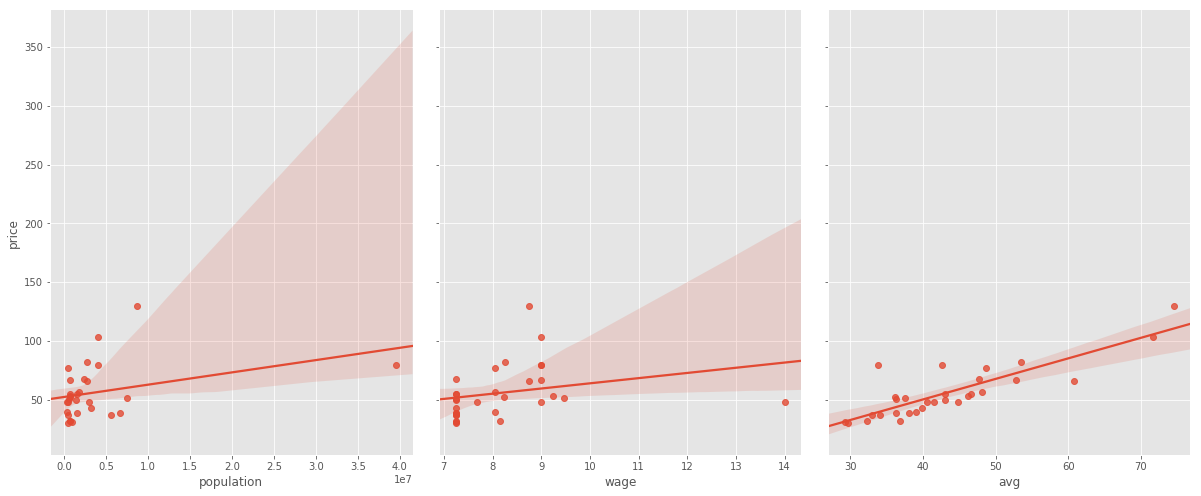

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt 
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['population','wage','avg'], y_vars='price', size=7, aspect=0.8,kind='reg')
plt.show()

##### 可以看過去出票價和人口、最低薪資是有正向關係的

### 使用線性迴歸
缺點：已經假設因素和結果間有線性關係

#### 先選擇人口、最低薪資、過去票價做迴歸分析

In [145]:
feature_cols = ['population','wage','avg']
# use the list to select a subset of the original DataFrame
X = data[feature_cols]
# equivalent command to do this in one line
X = data[['population','wage','avg']]
# print the first 5 rows
X.head()
# check the type and shape of X
#type(X)
#X.shape

,population,wage,avg
0,501178,7.25,34.086387
1,694784,9.00,52.863043
2,2716000,8.75,60.846667
3,889019,7.25,29.201045
4,2679044,8.25,53.546522


In [147]:
y = data['price']
# equivalent command that works if there are no spaces in the column name

# print the first 5 values
y.head()

0    36.82
1    66.49
2    66.15
3    30.60
4    82.33
Name: price, dtype: float64

In [148]:
import sklearn
from sklearn.model_selection import train_test_split  #这里是引用了交叉验证
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [149]:

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(22, 3)
(22,)
(8, 3)
(8,)


In [150]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print (model)
print (linreg.intercept_)
print (linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
-15.675553225598023
[ 1.08116411e-06 -6.42747153e-02  1.57149604e+00]


In [151]:
y_pred = linreg.predict(X_test)
print (y_pred)

[ 41.80416295  45.39009575  61.44342202 110.20373806  35.28649298
  57.86405604  53.24215332  30.70895685]


In [152]:
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

RMSE by hand: 3.106744364106189


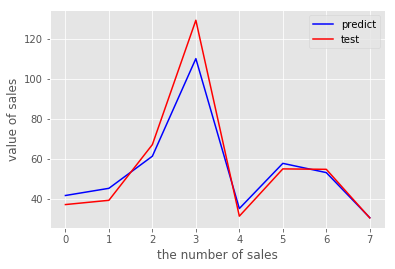

In [153]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

#### 因為最低薪資的coef是負的，因此嘗試將最低薪資拿掉

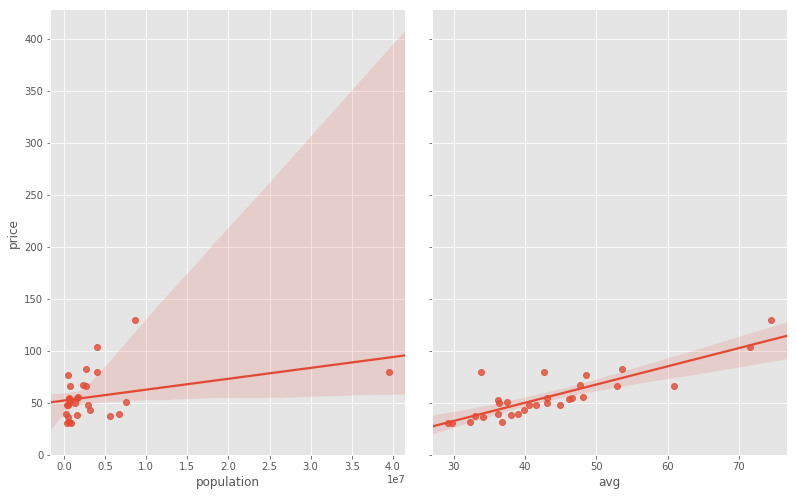

In [155]:
sns.pairplot(data, x_vars=['population','avg'], y_vars='price', size=7, aspect=0.8,kind='reg')
plt.show()

In [21]:
feature_cols = ['population','avg']
# use the list to select a subset of the original DataFrame
X = data[feature_cols]
# equivalent command to do this in one line
X = data[['population','avg']]
# print the first 5 rows
X.head()
# check the type and shape of X
#type(X)
#X.shape

,population,avg
0,501178,34.086387
1,694784,52.863043
2,2716000,60.846667
3,889019,29.201045
4,2679044,53.546522


In [22]:
import sklearn
from sklearn.model_selection import train_test_split  #这里是引用了交叉验证
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(22, 2)
(22,)
(8, 2)
(8,)


In [24]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print (model)
print (linreg.intercept_)
print (linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
-16.109798640462586
[1.07912375e-06 1.56917980e+00]


In [25]:
y_pred = linreg.predict(X_test)
print (y_pred)

[ 41.74799558  45.38236139  61.35976113 110.14168033  35.24214988
  57.78642946  53.1709349   30.67125269]


In [26]:
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)

RMSE by hand: 3.113929673551462


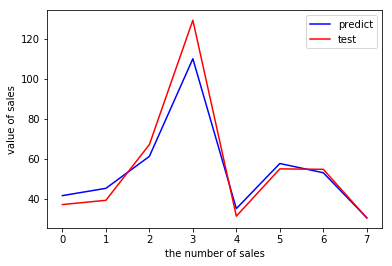

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

## 小結：
#### 結果RMSE並沒有下降，從圖看來線也沒有比較吻合，可以試試看交互作用

### 過往價錢可以解釋大部分的結果，嘗試用指數平滑法單獨利用過往價錢預測未來價格

In [156]:
import pandas as pd  # pandas庫
import numpy as np  # numpy庫
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # acf和pacf展示庫
from statsmodels.tsa.stattools import adfuller  # adf檢驗庫
from statsmodels.stats.diagnostic import acorr_ljungbox  # 隨機性檢驗庫
from statsmodels.tsa.arima_model import ARMA  # ARMA庫
import matplotlib.pyplot as plt  # matplotlib圖形展示庫
import prettytable  # 匯入表格庫
# 由於pandas判斷週期性時會出現warning，這裡忽略提示
import warnings
warnings.filterwarnings('ignore')

#### 讀取資料 ####
# 建立解析列的功能物件
date_parse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y') 
# 讀取資料
df = pd.read_excel('/Users/jen/Desktop/abc.xlsx', delimiter='\t', index_col='date', date_parser=date_parse)  
# 將列轉換為float32型別
ts_data = df['number'].astype('float32') 
print ('data summary') 
# 列印輸出時間序列資料概況
print (ts_data.describe()) 

data summary
count    17.000000
mean     38.253937
std       3.519289
min      34.750000
25%      36.130001
50%      36.900002
75%      38.000000
max      45.869999
Name: number, dtype: float64


In [157]:
data=pd.read_excel('/Users/jen/Desktop/abc.xlsx')
data

,date,number
0,1998,36.790000
1,1999,45.750000
2,2000,45.870000
3,2001,42.810000
4,2002,37.500000
5,2003,37.500000
6,2004,37.680000
7,2005,41.430000
8,2007,38.000000
9,2008,36.900000


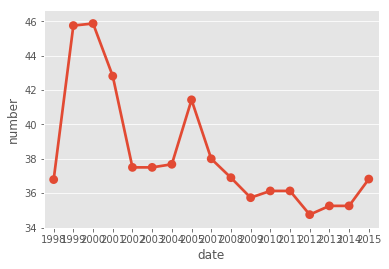

In [158]:
sns.pointplot(x='date',y="number",data=data)

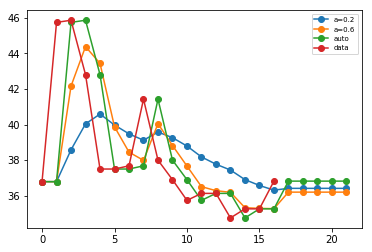

In [52]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
# plot
l1, = plt.plot(list(fit1.fittedvalues) + list(fit1.forecast(5)), marker='o')


fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.6,optimized=False)
# plot
l2, = plt.plot(list(fit2.fittedvalues) + list(fit2.forecast(5)), marker='o')


fit3 = SimpleExpSmoothing(data).fit()
# plot
l3, = plt.plot(list(fit3.fittedvalues) + list(fit3.forecast(5)), marker='o')

l4, = plt.plot(data, marker='o')
plt.legend(handles = [l1, l2, l3, l4], labels = ['a=0.2', 'a=0.6', 'auto', 'data'], loc = 'best', prop={'size': 7})
plt.show()

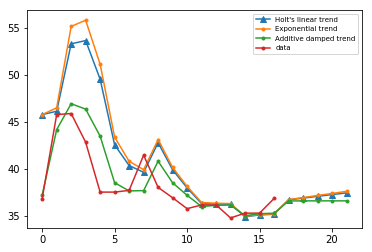

In [53]:
data_sr = pd.Series(data)
# Holt’s Method
fit1 = Holt(data_sr).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
l1, = plt.plot(list(fit1.fittedvalues) + list(fit1.forecast(5)), marker='^')

fit2 = Holt(data_sr, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
l2, = plt.plot(list(fit2.fittedvalues) + list(fit2.forecast(5)), marker='.')

fit3 = Holt(data_sr, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
l3, = plt.plot(list(fit3.fittedvalues) + list(fit3.forecast(5)), marker='.')

l4, = plt.plot(data_sr, marker='.')
plt.legend(handles = [l1, l2, l3, l4], labels = ["Holt's linear trend", "Exponential trend", "Additive damped trend", 'data'], loc = 'best', prop={'size': 7})
plt.show()

#### Holt's Method中，綠線預測的和真實情況最準

### 多元迴歸分析(OLS)

In [159]:
import urllib.request
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

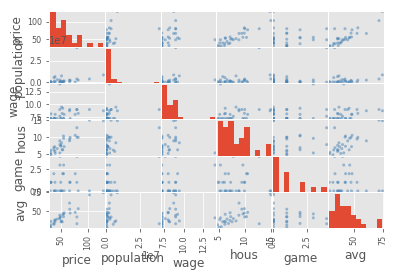

In [160]:
ticket=pd.read_excel("/Users/jen/Desktop/nba_final.xlsx")
pd.plotting.scatter_matrix(ticket, color='steelblue')
plt.show()

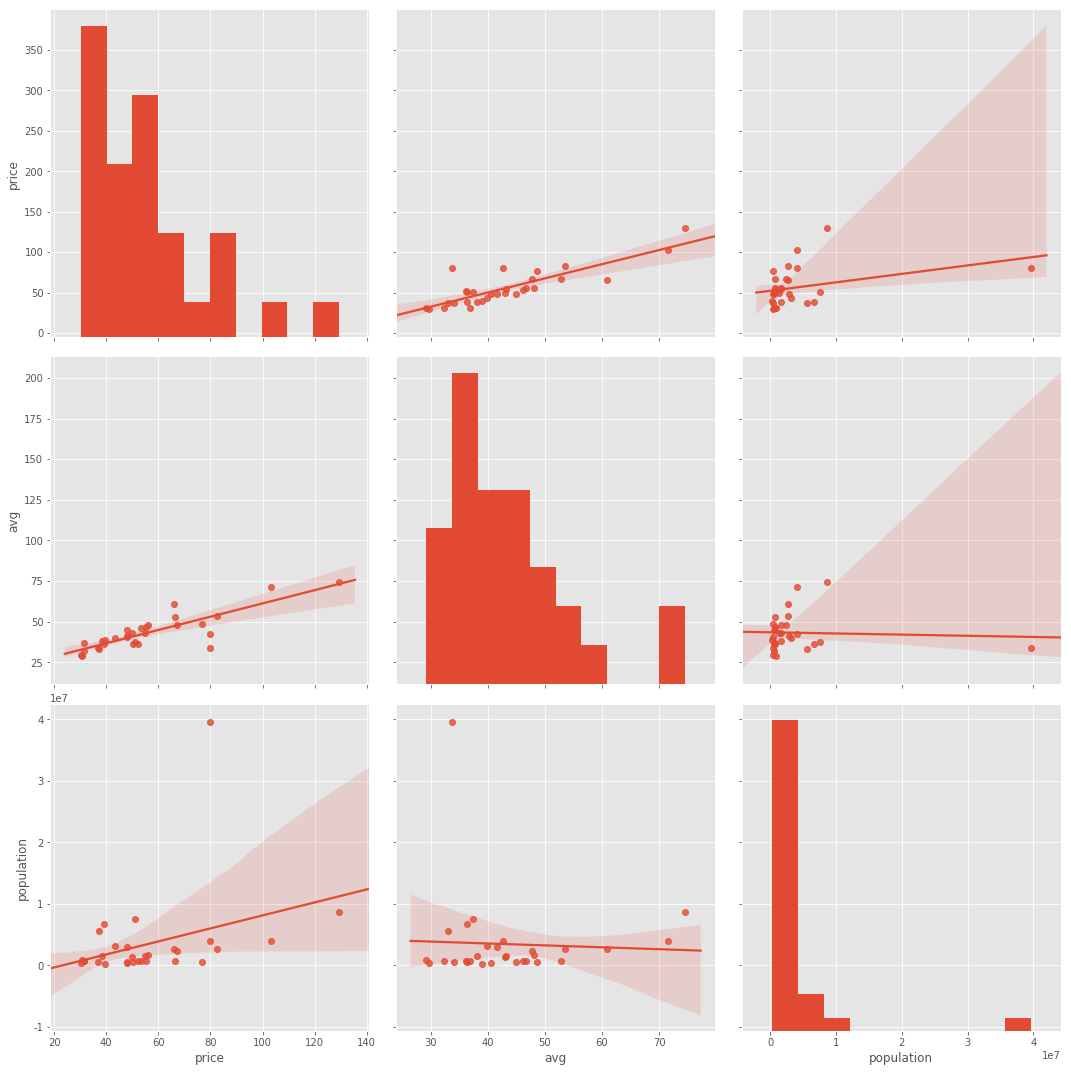

In [161]:
import seaborn
seaborn.pairplot(ticket, vars=['price', 'avg', 'population']
                ,kind = 'reg', size=5)
plt.show()

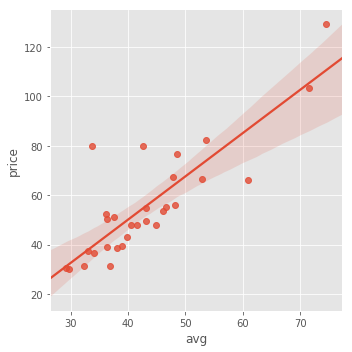

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     60.74
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.64e-12
Time:                        20:48:08   Log-Likelihood:                -100.00
No. Observations:                  30   AIC:                             210.0
Df Residuals:                      25   BIC:                             217.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.0799      9.451     -3.289      0.0

In [163]:
# 單變量回歸繪圖+交互作用
seaborn.lmplot(y='price', x = 'avg',data=ticket)
plt.show()
# 建模
from statsmodels.formula.api import ols
results = ols('price~avg +population+hous+wage', data = ticket).fit()
print(results.summary())

## 結論
ols變項和交互作用項，都是嘗試過後最好的結果，可以看到顯著的有過去票價、需要工作的時數
因此，過去票價越高的球隊，消費者能夠接受的票價也越高
而需要工作的時數，則隱喻了越有錢的人，越能夠接受高價位的票價，和一般認知相符